In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('14.1 data.csv')
df.head()

,Sum,Days,Color
0,22.072345,36.758307,1
1,37.936710,55.784810,1
2,21.083576,47.319176,1
3,31.120670,54.406780,1
4,43.711550,42.557729,1


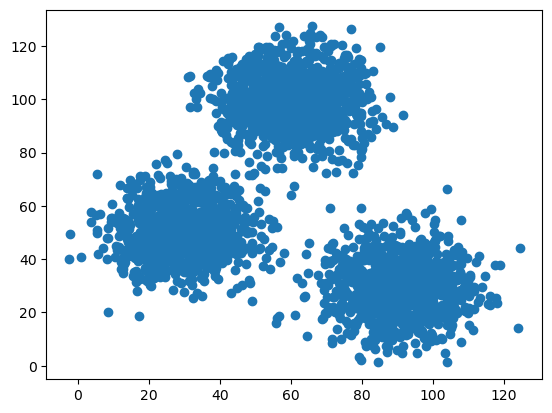

In [5]:
plt.scatter(df['Sum'], df['Days']);

In [6]:
data = df[['Sum', 'Days']]

n_clusters = list(range(2, 7))
metrics = []

for k in n_clusters:
    km = KMeans(n_clusters=k).fit(data)
    score = silhouette_score(data, km.labels_)
    metrics.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

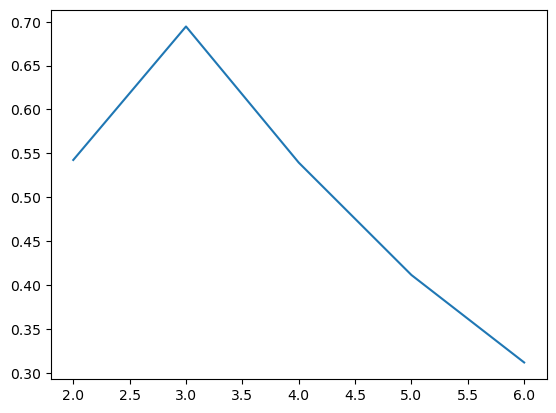

In [8]:
plt.plot(n_clusters, metrics);


# Видео 2

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('data.csv')
df.head()

In [ ]:
sns.scatterplot(df['Sum'], df['Days'], hue=df['Color'])

In [ ]:
features = ['Sum', 'Days']

df_g = df.groupby('Color').agg({x: ['mean', 'std'] for x in features}).T
df_g

In [ ]:
import numpy as np

functions = ['mean', 'std']

stat = np.array([[df[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

In [ ]:
cluster_labels = [0, 1, 2]

for label in cluster_labels:
  df_g_rel[label] = 100 * df_g_rel[label] / df_g_rel['Global'] - 100

df_g_rel

In [ ]:
sns.heatmap(df_g_rel[cluster_labels], cmap='coolwarm')

# Видео 3

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('st900.csv')
df.head()

In [ ]:
df.shape

In [ ]:
km = KMeans(n_clusters=4).fit(df)
labels = km.labels_

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20)
df_emb = tsne.fit_transform(df)
data = pd.DataFrame(df_emb)
data

In [ ]:
sns.scatterplot(data[0], data[1], hue=labels)